In [1]:
import numpy as np
import pandas as pd

In [5]:
drinks = pd.read_csv('drinks_dataset.csv')
drinks.drop(columns= drinks.columns[0], inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [8]:
drinks.rename(columns = {'total' in drinks: 'total'}, inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [9]:
drinks.to_json('drinksbycountry.json') #with column headings modified
drinks

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [10]:
df = pd.read_json('drinksbycountry.json')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<AxesSubplot:xlabel='continent'>

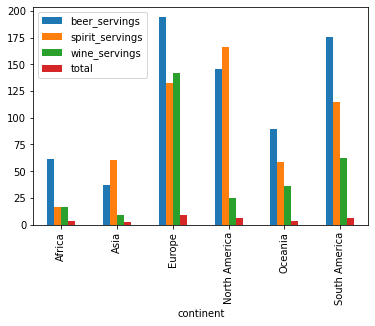

In [12]:
df.groupby(by='continent').mean().plot.bar()

In [15]:
df_1 = pd.pivot_table(df, 
                      index=['continent'],
                      values = ['total'],
                     aggfunc= ['mean', 'sum', 'max'])
df_1

,mean,sum,max
,total,total,total
continent,,,
Africa,3.007547,159.4,9.1
Asia,2.170455,95.5,11.5
Europe,8.617778,387.8,14.4
North America,5.995652,137.9,11.9
Oceania,3.381250,54.1,10.4
South America,6.308333,75.7,8.3


In [18]:
bc = df.groupby('continent').mean()
bc

,beer_servings,spirit_servings,wine_servings,total
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<AxesSubplot:>

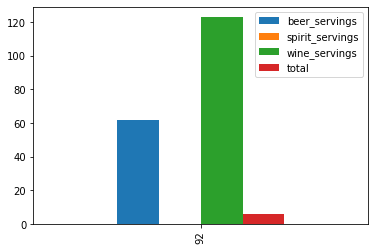

In [32]:
df[(df.wine_servings >= 10) & (df.continent == 'Asia')].plot(kind='bar')

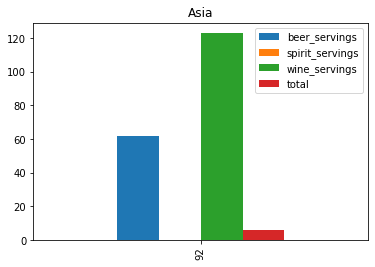

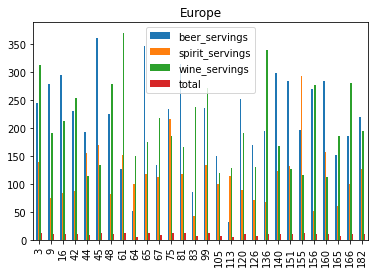

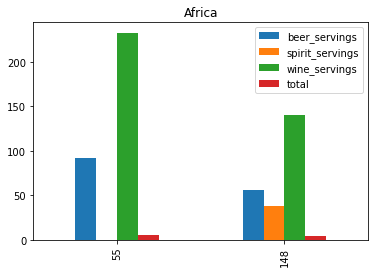

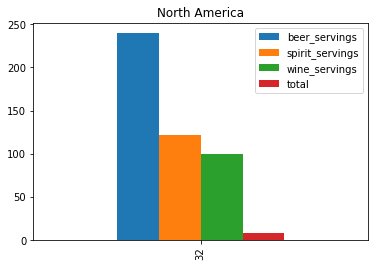

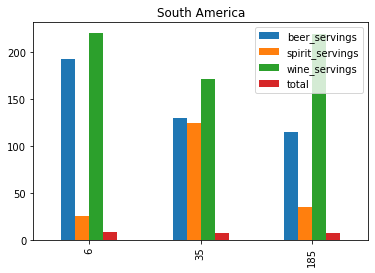

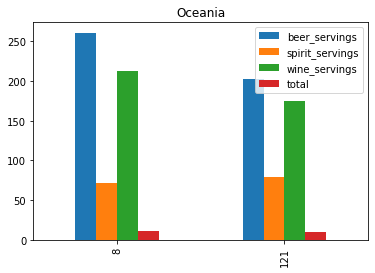

In [39]:
import matplotlib.pyplot as plt
def servings(df):
    for i in df['continent'].unique():
        df_2 = df[(df.wine_servings >= 100) & (df.continent == i)]
        df_2.plot(kind= 'bar')
        plt.title(i)
servings(df)